<img src=images/gdd-logo.png width=300px align=right>

# Sklearn for Linear Regression

In this notebook you will use Scikit-Learn to perform linear regression on an E-commerce Customer Dataset.

## Goal

The goal is to predict the ‘Yearly Amount Spent’ by a customer on an E-commerce platform, so that this information can be used to give the particular customer personalized offers or Loyalty membership etc.

The notebook will help you with the initial data exploration, but you will perform the actual modelling!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading in the data

This is the dataset we will be performing linear regression on.

We will try to predict ‘Yearly Amount Spent’, so this will be our target vector (=dependent variable).

In [4]:
customers = (
    pd.read_csv('data/Ecomm-Customers.csv')
    .rename(str.lower, axis='columns')
)
customers.head()

,email,address,avatar,avg. session length,time on app,time on website,length of membership,yearly amount spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


amount_spent = 400* avg. session length + 323* time on app 

### <mark>Exercise: Perform some preliminary analysis on the dataset.</mark>

* How many customers are in this dataset?

* What datatypes does the dataset contain? Are there any missing values?

* How many predictive features are there? Which features do you think might be informative for the target?

<details>
    
  <summary><span style="color:blue">Show answer</span></summary>
  
Key features:
- avg. session length	
- time on app	
- time on website	
- length of membership

Notes about the other features:
- Email is unique for everyone so not going to be predictive. 
- We could maybe extract some information from address (country, area etc.) to get some more predictive features, but for now let's not focus on that.
- Avatar could be predictive but there are so many different unique values we'd need to explore more and find a way to group them. 
    
</details>

* How many different values are there in the 'Yearly Amount Spent' column? Write a sentence to argue why this is a regression task, rather than a classification task.

<details>
    
  <summary><span style="color:blue">Show answer</span></summary>
  
This is a regression problem due to the amount of unique target values and the fact that they are continuous.
    
</details>

## Correlation

*Correlation - a statistic that measures the degree to which two variables move in relation to each other.*

We will try to learn a model that predicts the yearly amount spent by a customer. However, what if we are able to predict that already from one variable alone? Or what if some variables are not relevant for predicting the yearly amount spent? 

Let's investigate whether any of the other variables correlate with the yearly amount spent.

### Visual inspection

Using pairplot we can visualise the relationship between the numerical columns.

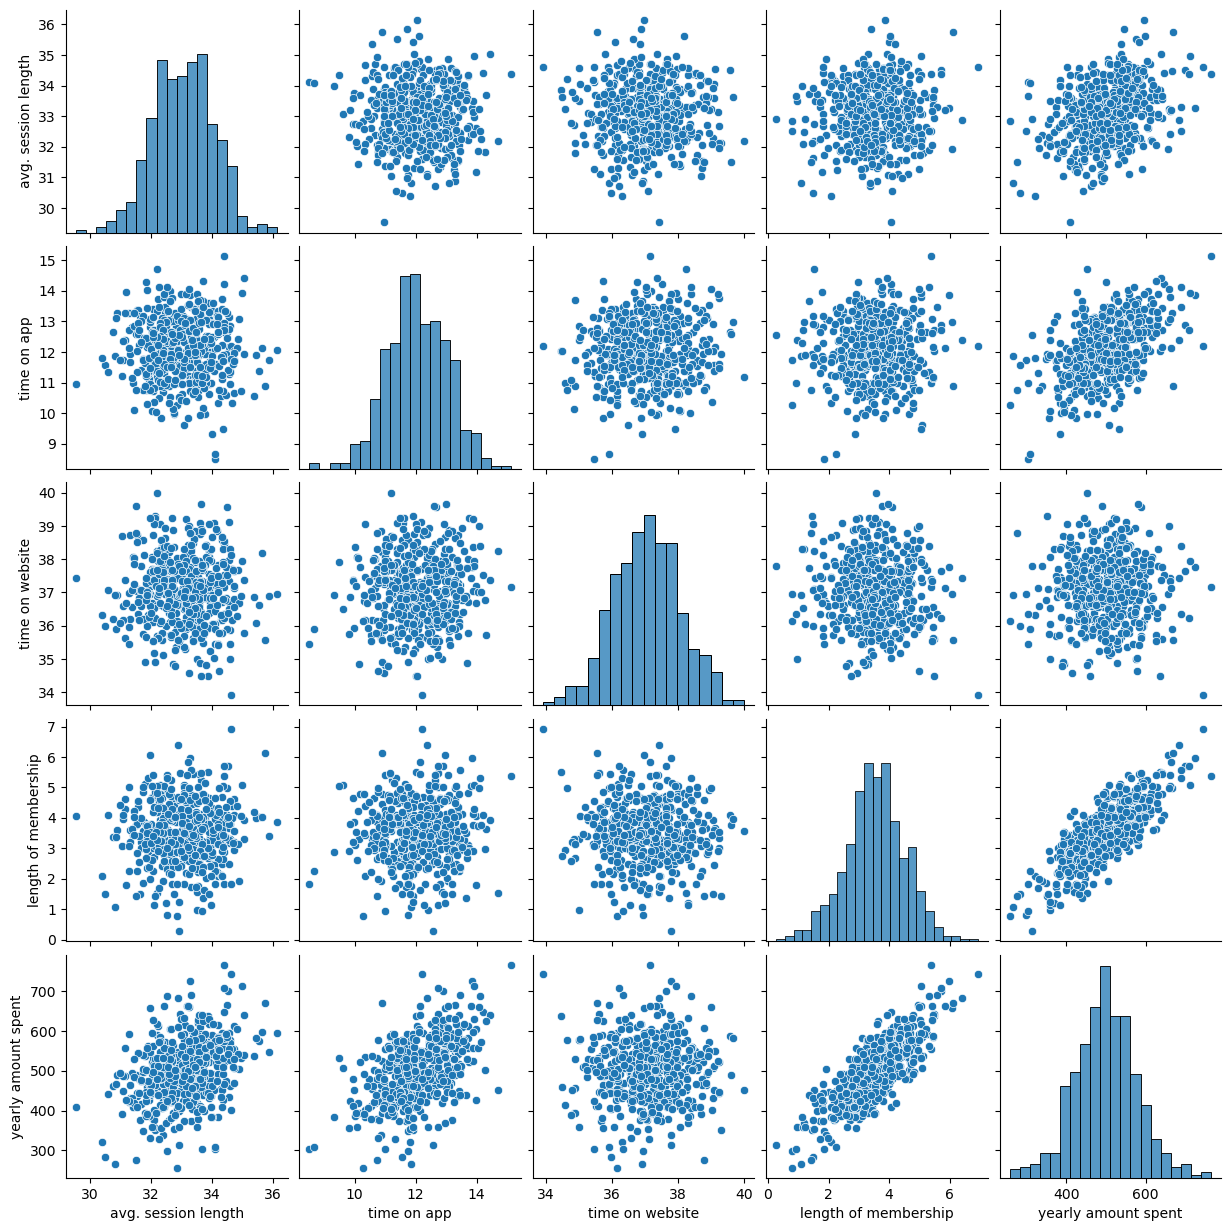

In [5]:
sns.pairplot(customers)

From the plots, ‘Length of Membership’ and ‘Time in App’ appear to be the variables that have the most correlation with the dependent variable.

### Correlation matrix

We can also compute the actual pairwise correlation of the columns.

In [6]:
customers.corr()

,avg. session length,time on app,time on website,length of membership,yearly amount spent
avg. session length,1.000000,-0.027826,-0.034987,0.060247,0.355088
time on app,-0.027826,1.000000,0.082388,0.029143,0.499328
time on website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
length of membership,0.060247,0.029143,-0.047582,1.000000,0.809084
yearly amount spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### Heatmap

This correlation matrix can be visualised with a heatmap. 

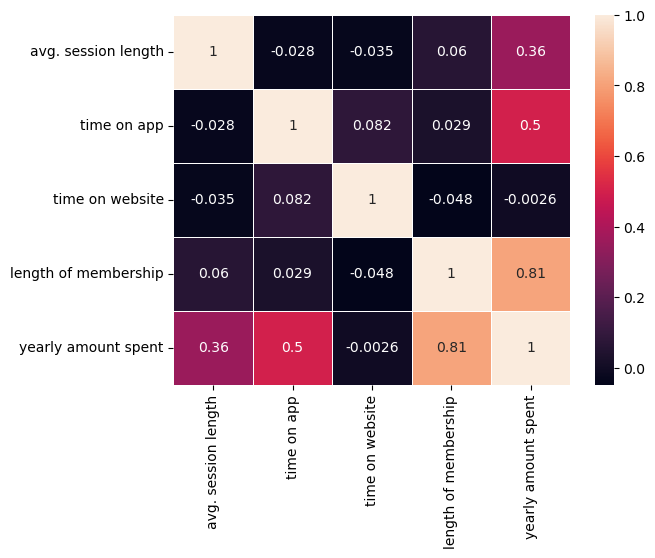

In [7]:
sns.heatmap(customers.corr(), linewidth=0.5, annot=True);

<AxesSubplot:xlabel='yearly amount spent', ylabel='time on app'>

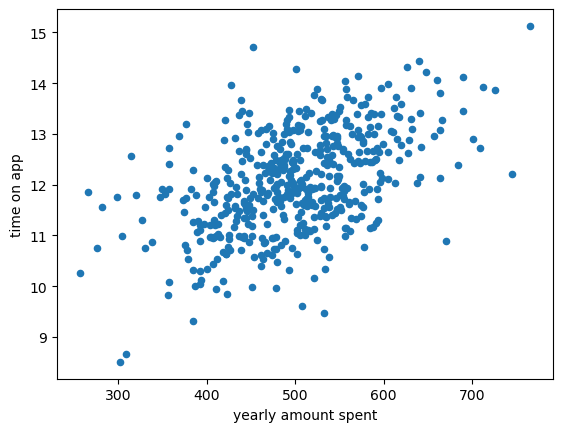

In [10]:
customers.plot(x="yearly amount spent", y="time on app", kind="scatter")

Along with the variables mentioned earlier, we can see that Avg. Session Length may also be informative for predicting the dependent variable.

## <mark>Exercise: Build a Linear Regression Model </mark>

### <mark>1. Create Predictor variables 'X' and Target Variable 'y'</mark>

For the time being, let’s form our feature matrix using the variables that appear to have a high degree of correlation with the dependent variable.

Create the X and y variables. X should have **only the following** variables: `time on app` and `length of membership`.


### <mark>2. Split the data into a training set and a testing set.</mark>

We will train our model on the training set and then use the test set to evaluate the model.

Reserve 30% of the data for testing and set a random seed of 100.

### <mark> 3. Import the model</mark>

Look up how to import a simple [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Import the model and then instantiate it.

### <mark>4. Train the model</mark>

Fit the model to the train set.

**Answers:**

In [16]:
# %load answers/04_Regression_Loyalty_Memberships/create-x-y.py
feature_columns = ['time on app', 'length of membership']
X = customers.loc[:, feature_columns]
y = customers.loc[:, 'yearly amount spent']

In [17]:
# %load answers/04_Regression_Loyalty_Memberships/train-test-split.py
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(f'X_train shape: {X_train.shape}', 
      f'X_test shape: {X_test.shape}', 
      f'y_train shape: {y_train.shape}', 
      f'X_test shape: {y_test.shape}',
     sep='\n')

X_train shape: (350, 2)
X_test shape: (150, 2)
y_train shape: (350,)
X_test shape: (150,)


In [18]:
# %load answers/04_Regression_Loyalty_Memberships/instantiate.py
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
# %load answers/04_Regression_Loyalty_Memberships/train.py
model.fit(X_train, y_train)

LinearRegression()

---

# Intercept and Coefficients

## 4. Investigate the model's intercept and coefficients.

What are they?

```python
# Print the intercept
print("Intercept", model.intercept_)

# Print the coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
```

*TAKE CARE: Make sure you replace `model` if you have instantiated your model with a different name!*

In [21]:
# %load answers/04_Regression_Loyalty_Memberships/int-coef.py
# Print the intercept
print("Intercept", model.intercept_)

# Print the coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept -172.76948828286902
                      Coefficient
time on app             37.137085
length of membership    63.531309


y = 37*time on app + 63*length of membership - 172

In [31]:
X.describe()

,time on app,length of membership
count,500.000000,500.000000
mean,12.052488,3.533462
std,0.994216,0.999278
min,8.508152,0.269901
25%,11.388153,2.930450
50%,11.983231,3.533975
75%,12.753850,4.126502
max,15.126994,6.922689


### Interpreting the model (inference)

a) What does the intercept represent in this context?

b) What do the coefficients represent?

c) Are the coefficients comparable?

<details>
    
  <summary><span style="color:blue">Show answer</span></summary>
  
***yearly amount spent = 37.1 * Time on App + 63.5 * Length of Membership - 172.8***

a. The intercept represents the value of yearly amount spent when time on app and length of membership are both 0.
    
b. The coefficients represent the increase of yearly amount spent when one of the features is increased by 1 unit (but everything else stays the same). 
    
c. The coefficients are not comparable as the time on app is MUCH smaller than length of membership.

</details>

## 5. Model Predictions

Use your model to make a prediction on the test set.



In [35]:
# %load answers/04_Regression_Loyalty_Memberships/predictions.py
y_pred = model.predict(X_test)
np.array([y_test[:10], y_pred[:10]]).T

array([[451.57568516, 468.40758934],
       [554.72208383, 572.87863866],
       [541.04983096, 507.55316534],
       [442.72289157, 434.00340953],
       [522.40414126, 479.46310768],
       [478.88539132, 493.86117605],
       [392.28524425, 431.17787597],
       [577.27345498, 572.94325392],
       [448.93329321, 514.5513274 ],
       [541.22658399, 582.33415689]])

## 6. Evaluating Predictions

We want to evaluate whether we have made good predictions or not.

a) Why would accuracy not be a good metric here?

### Visual inspection

b) **Make a scatter plot** that plots the test set against your predictions.

```python
plt.scatter(y_test, y_pred)
plt.xlabel("Test")
plt.ylabel("Predictions")
```

Text(0, 0.5, 'Predictions')

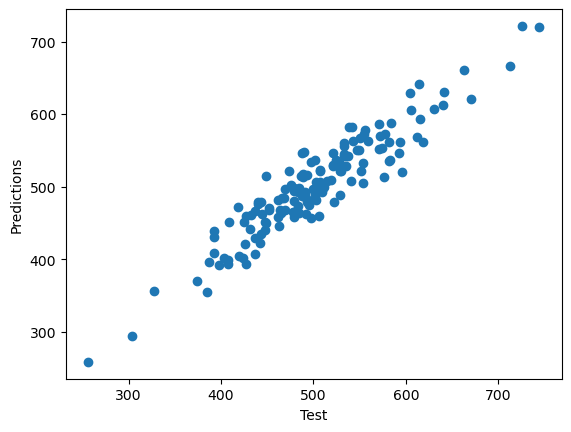

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test")
plt.ylabel("Predictions")

c) If your linear regression was really accurate what would you expect to see?
How does yours compare?

<details>
    
  <summary><span style="color:blue">Show answer</span></summary>

a. Because with accuracy we are seeing how many targets we managed to get EXACTLY right. We are rarely going to ever be precise with a continuous target, but that doesn't mean we're not really close!
    
c. We would expect to see a diagonal line (predictions and true values match up exactly).

</details>

### Regression Metrics

Rather than trying to interpret our scatter plot, we can also calculate some metrics.

For example, we could calculate the average error of our regression (e.g. how wrong we were on average). The model that gives you the smallest average error would be the best.

#### **Coefficient of Determination**, denoted $R^2$ 
We can use `.score()` method here which, when you apply this method to a linear regression model, returns $R^2$.

Find the coefficient of determination of your model using the following:

```python
model.score(X_test, y_test)
```

In [38]:
model.score(X_test, y_test)

0.8779325136809053

The **Coefficient of Determination**, or $R^2$ score, is a **goodness-of-fit** measurement for regression models. 

It is a measure of the percentage of variance in the target which the features explain collectively. 

Accordingly, the $R^2$ score indicates the strength of the relationship between your model and the target on a scale between **0 – 100%**.

As well as $R^2$, it is common to report one of the following: 

- **Mean Absolute Error (MAE)**
    -  MAE is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.
- **Mean Squared Error (MSE)**
    - The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.
- **Root Mean Squared Error (RMSE)**
    - The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. 

d) Why would it not be ok to just calculate Mean Error?

Import metrics from sklearn and then calulate the following:

e) Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

You can find these in sklearn.metrics: 
- mean_absolute_error
- mean_squared_error

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [41]:
mean_absolute_error(y_test, y_pred)

20.43027853256944

In [42]:
mean_squared_error(y_test, y_pred)

683.0381584644712

In [43]:
mean_squared_error(y_test, y_pred, squared=False)

26.13499872707996

f) What is the difference between the metrics, and what will MSE/RMSE be more sensitive to than MAE?

<details>
    
  <summary><span style="color:blue">Show answer</span></summary>

d. It would not be okay to calculate the mean error, since the positive and negative differences could then cancel each other out. 
    
f. MSE/RMSE will be more sensitive to outliers in the data as larger diversions from the linear relationship will be pulled out more clearly.

</details>

## 7. Overfitting

By evaluating predictions on the data we trained on, we can check for underfitting and overfitting.

a) Make predictions on the train set and compute the same metrics as before (MAE, MSE & RMSE).

b) What would you expect to see if we were overfitting?

```python
# get predictions for the train data
train_pred = model.predict(X_train)

# find the MAE, MSE and RMSE for the train and test data
print('Train MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('Train MSE:', metrics.mean_squared_error(y_train, train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
```

In [45]:
from sklearn import metrics
# get predictions for the train data
train_pred = model.predict(X_train)

# find the MAE, MSE and RMSE for the train and test data
print('Train MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('Train MSE:', metrics.mean_squared_error(y_train, train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train MAE: 22.97808086250326
Train MSE: 774.4953764663674
Train RMSE: 27.82975703211164
Test MAE: 20.43027853256944
Test MSE: 683.0381584644712
Test RMSE: 26.13499872707996


<details>
    
  <summary><span style="color:blue">Show answer</span></summary>

If we were overfitting, we would expect the test scores to be much higher (so worse) compared to the train scores. 

</details>

## <mark> Exercise: Incorporating more features </mark>

Remember we had left out a variable which had lesser degree of positive correlation? Add that variable (`avg. session length`) and see if it improves the model.

Compare performance using the same metrics as before (MAE, MSE & RMSE) when this extra information is included in the feature matrix.

In [ ]:
# %load answers/04_Regression_Loyalty_Memberships/extra-feature.py

# Conclusion

We've now seen an example of a regression model and seen how the steps for building this follow that of what we saw in the classification examples. However, you also have learned why there is a need for different metrics, and how you can use regression metrics to evaluate your model.